In [1]:
#导入鸢尾花数据
from sklearn.datasets import load_iris
data = load_iris()

In [5]:
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [29]:
import pandas as pd
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target_names[data.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


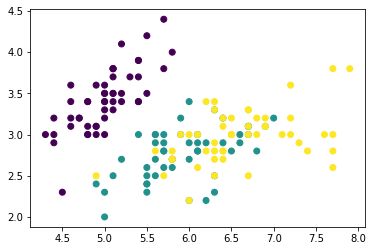

In [30]:
import matplotlib.pyplot as plt
plt.scatter(data.data[:,0],data.data[:,1],c=data.target)
plt.show()

In [31]:
X = data.data
y = data.target
print(X.shape,y.shape)

(150, 4) (150,)


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3,stratify=y)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(105, 4) (45, 4)
(105,) (45,)


In [40]:
import numpy as np
def distance(a,b):
    return np.sum(np.abs(a-b),axis=1)
    

In [41]:
class KNN(object):
    # 构造函数
    def __init__(self,k):
        self.k = k
        
    # 训练函数
    def fix(self,x,y):
        self.x_train = x
        self.y_train = y
        
    
    
    
    def predict(self,x):
        # 传进来的x要预测y
        y_pre = np.zeros((x.shape[0],1),dtype=self.y_train.dtype)
        
        # 1、遍历这个x
        for i,x_test in enumerate(x):
        
        # 2、计算每个测试数据跟训练集的距离
            dis = distance(self.x_train,x_test)
            
            
        # 3、距离排序
            ind = np.argsort(dis)
        
        # 4、取距离最小的前k个值
            y_k = self.y_train[ind[:self.k]]
        
        # 5、统计这前k个值中出现频率最大的那个类别，预测为这个类别
            y_pre[i] = np.argmax(np.bincount(y_k))
        return y_pre
            
            
        
        
        
        

In [46]:
k_list = [1,3,4,5,7]

for k in k_list:
    knn = KNN(k=k)
    knn.fix(X_train,y_train)
    y_pre = knn.predict(X_test)
    print(k,accuracy_score(y_test,y_pre))



1 0.9555555555555556
3 0.9555555555555556
4 0.9333333333333333
5 0.9555555555555556
7 0.9555555555555556


In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pre)

0.9555555555555556

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

